# Homework 6: Problems

### AISHWARYA GIRDHAR

aishwarya.girdhar@student.uibk.ac.at

Aish0107

13.11.2018.

### ASTROINFORMATICS
https://github.com/astromundus/astroinfo2018/blob/master/homework/HW6.ipynb

### Some useful definitions and functions

In [5]:
import numpy as np
from matplotlib import pyplot as plt
from astroML.datasets import fetch_LINEAR_geneva
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

## Problem 1: Principal Component Analysis

PCA applied to 4-D data for variable stars from the SDSS and LINEAR surveys:

-- SDSS u-g and g-i colors, 

-- LINEAR variability period (logP) and variability amplitude (A).

Read the data (see below), run PCA (with four components), and then

a) to get familar with the dataset, plot g-i vs. u-g and A vs. logP diagrams

b) plot P2 vs. P1 diagram, and P3 vs. P1 diagram, and P3 vs. P4 diagram. 
Comment what insights, if any, did PCA analysis bring. 

c) plot P1 vs. g-i and P1 vs. logP diagrams; repeat with P2, P3, and P4.
Comment what insights, if any, did PCA analysis bring. 

***First obtain LINEAR data for 6,146 stars using astroML built-in function: ***

In [4]:
data = fetch_LINEAR_geneva()
# N.B. this is a 7-dimensional dataset
ug = data['ug']
gi = data['gi']
logP = data['logP']
A = data['amp']

***a) to get familar with the dataset, plot g-i vs. u-g and A vs. logP diagrams***

Text(0.5,0,'gi')

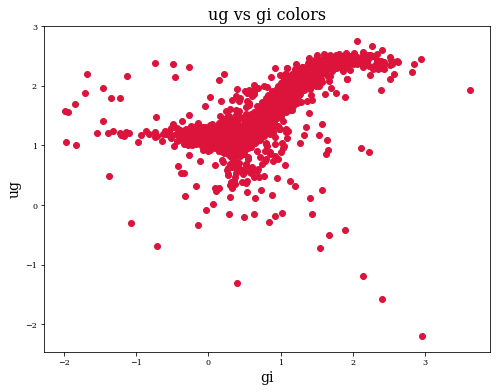

In [12]:
fig, ax = plt.subplots(figsize = (8,6))
ax.scatter(gi, ug, color = 'crimson')
ax.set_title("ug vs gi colors", fontsize = 16)
ax.set_ylabel("ug", fontsize = 14)
ax.set_xlabel("gi", fontsize =14)

correlation can be seen between gi and ug colors. We require better analysis techniques, hopefully PCA would help.

Text(0,0.5,'A')

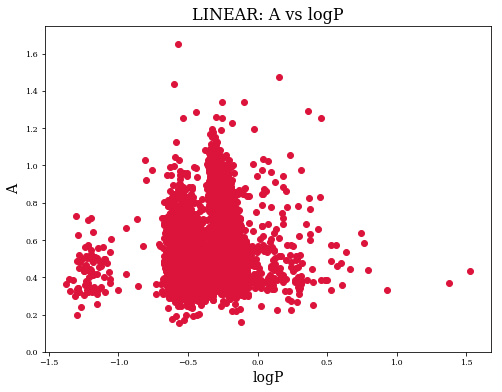

In [13]:
fig, ax = plt.subplots(figsize = (8,6))
ax.scatter(logP, A, color = 'crimson')
ax.set_ylim(0, 1.75)
ax.set_title("LINEAR: A vs logP", fontsize = 16)
ax.set_xlabel("logP", fontsize = 14)
ax.set_ylabel("A", fontsize = 14)

No correlation can be seen between A and logP. We require better analysis techniques, hopefully PCA would help.

***Question: Run PCA (with four components)***

***b) plot P2 vs. P1 diagram, and P3 vs. P1 diagram, and P3 vs. P4 diagram. Comment what insights, if any, did PCA analysis bring.*** 

In [14]:
pca = PCA(4)

In [19]:
#To create a stack of arrays where every element is an array having all the properties of one particular star.
stack = np.stack((ug, gi, logP, A), axis=-1)
#print (stack.shape)

stack_std = StandardScaler().fit_transform(stack)


#Creating the transformation matrix by fitting on data
pca.fit(stack_std)

#Access values and vectors
print ("components", pca.components_)
print (" ")
#Variance along each axis

print ("Variances along the axes: ", pca.explained_variance_)
print ("Ratio of variances along the axes: ", pca.explained_variance_ratio_)

#transformed data
trans = pca.transform(stack)
#print (trans.shape)
pcomp = trans.T
#print (pcomp.shape)

components [[ 0.67056846  0.66427779 -0.32811521 -0.03759482]
 [-0.13523943 -0.16006069 -0.50446263 -0.83762063]
 [ 0.16319996  0.19862079  0.79808442 -0.54495579]
 [-0.71092476  0.70261325 -0.03031703 -0.00122   ]]
 
Variances along the axes:  [ 1.77136971  1.06420162  0.84520382  0.31987579]
Ratio of variances along the axes:  [ 0.44277037  0.26600712  0.21126657  0.07995594]


**Comment: We can see that the variances along component 1, 2 and 3 make up to about 92 percent of the variances. Hence pca 4 isn't contributing much to the variance.**

Text(0,0.5,'PCA2')

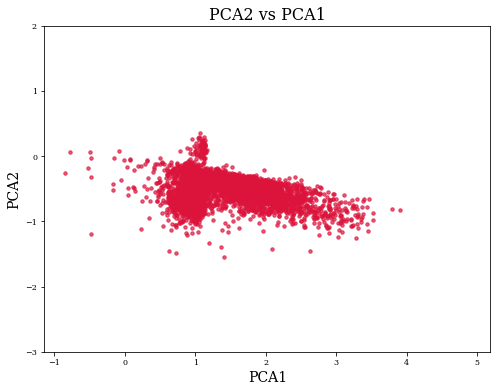

In [25]:
#Making plots: P2vsP1
fig, ax = plt.subplots(figsize = (8,6))
ax.scatter(pcomp[0], pcomp[1], color = 'crimson', alpha = 0.7, s =12)
#ax.set_xlim(-1.25,0.5)
ax.set_ylim(-3,2)
ax.set_title("PCA2 vs PCA1", fontsize = 16)
ax.set_xlabel("PCA1", fontsize =14)
ax.set_ylabel("PCA2", fontsize =14)

Text(0,0.5,'PCA3')

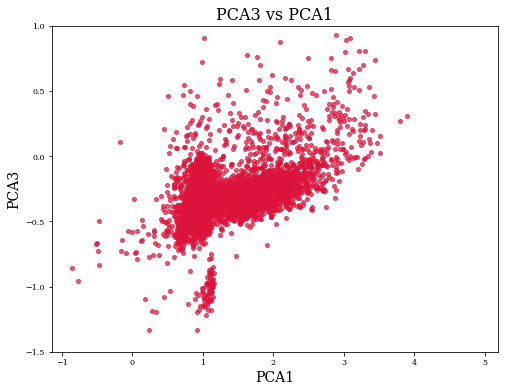

In [29]:
#Making plots: P3 vs P1
fig, ax = plt.subplots(figsize = (8,6))
ax.scatter(pcomp[0], pcomp[2], color = 'crimson', alpha = 0.7, s=16)
ax.set_ylim(-1.5,1)
ax.set_title("PCA3 vs PCA1", fontsize = 16)
ax.set_xlabel("PCA1", fontsize =14)
ax.set_ylabel("PCA3", fontsize =14)

(-2, 2)

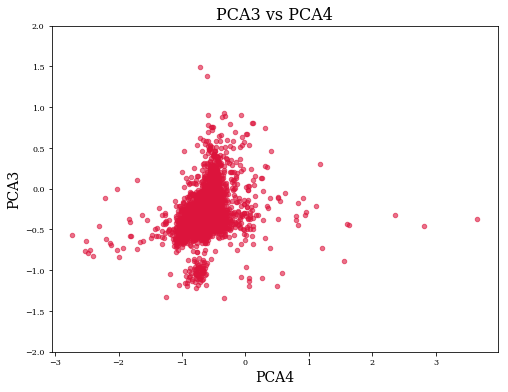

In [40]:
#Making plots: P3 vs P4
fig, ax = plt.subplots(figsize = (8,6))
ax.scatter(pcomp[3], pcomp[2], color = 'crimson', alpha = 0.6, s =20)
ax.set_title("PCA3 vs PCA4", fontsize = 16)
ax.set_xlabel("PCA4", fontsize =14)
ax.set_ylabel("PCA3", fontsize =14)
ax.set_ylim(-2,2)

***Comment Insights:***
* We can see maximum variance along the PCA 1 axis from first and second plot. 
* All three plots show clustering of data points, which indicates that certain stars have similar properties.

c) plot P1 vs. g-i and P1 vs. logP diagrams; repeat with P2, P3, and P4. Comment what insights, if any, did PCA analysis bring. 

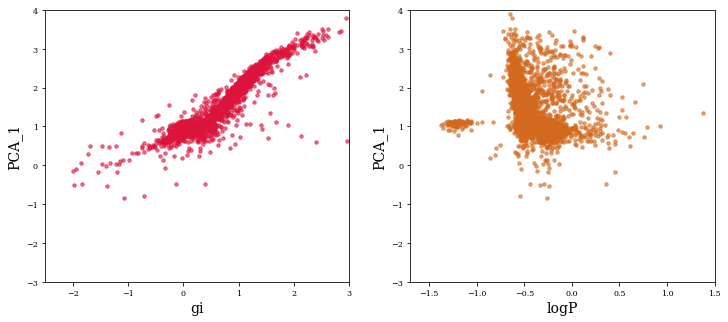

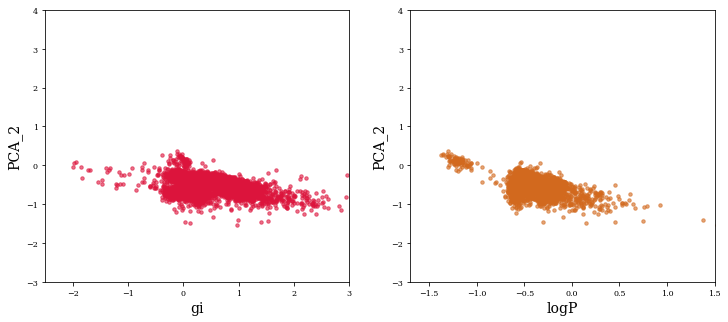

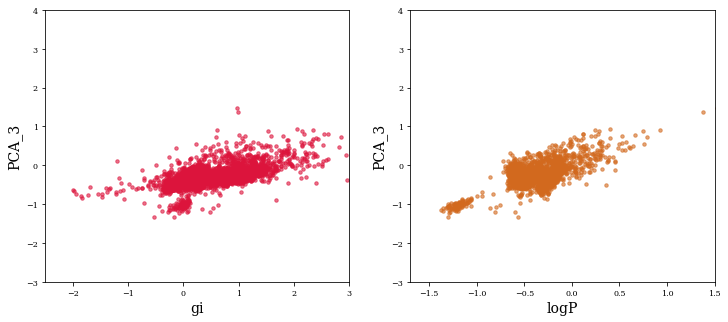

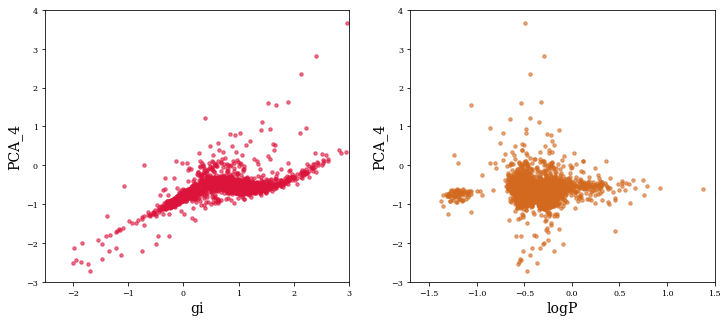

In [55]:
for i in range(0,4):
    fig = plt.figure(figsize=(12,5))
    ax = plt.subplot(121)
    ax.scatter(gi, pcomp[i], color = 'crimson', alpha =0.6, s=12)
    ax.set_ylim(-3,4)
    ax.set_xlim(-2.5,3)
    ax.set_ylabel("PCA_"+str(i+1), fontsize = 14)
    ax.set_xlabel("gi", fontsize = 14)
    ax = plt.subplot(122)
    ax.scatter(logP, pcomp[i], color = 'chocolate', alpha =0.6, s=12)
    ax.set_ylim(-3,4)
    ax.set_xlim(-1.7,1.5)
    ax.set_ylabel("PCA_"+str(i+1), fontsize = 14)
    ax.set_xlabel("logP", fontsize = 14)

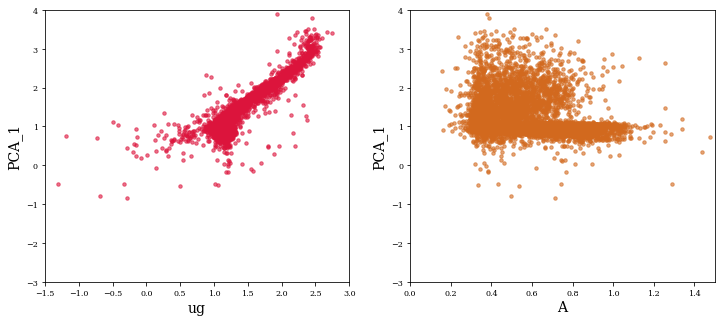

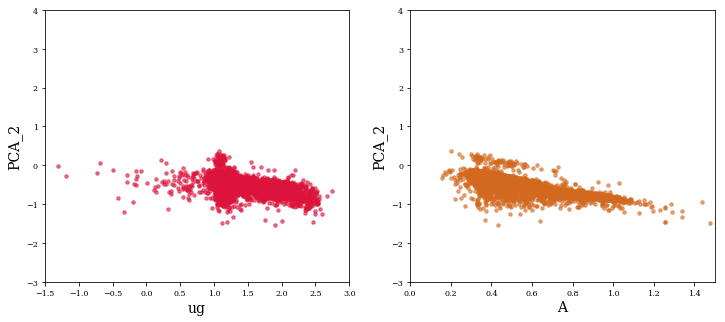

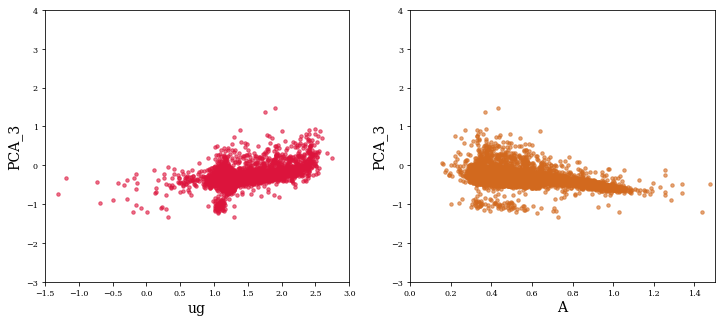

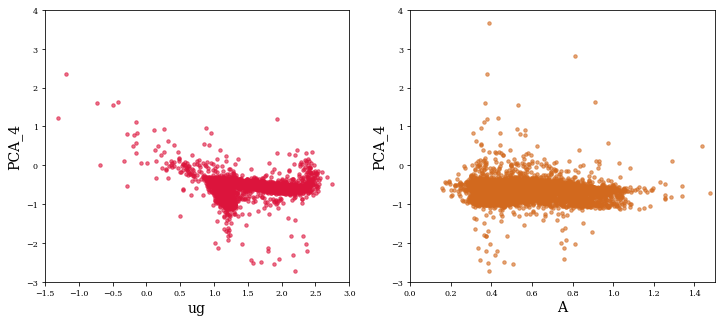

In [57]:
for i in range(0,4):
    fig = plt.figure(figsize=(12,5))
    ax = plt.subplot(121)
    ax.scatter(ug, pcomp[i], color = 'crimson', alpha =0.6, s=12)
    ax.set_ylim(-3,4)
    ax.set_xlim(-1.5,3)
    ax.set_ylabel("PCA_"+str(i+1), fontsize = 14)
    ax.set_xlabel("ug", fontsize = 14)
    ax = plt.subplot(122)
    ax.scatter(A, pcomp[i], color = 'chocolate', alpha =0.6, s=12)
    ax.set_ylim(-3,4)
    ax.set_xlim(0,1.5)
    ax.set_ylabel("PCA_"+str(i+1), fontsize = 14)
    ax.set_xlabel("A", fontsize = 14)

***Comment:*** 
* Correlation can be observed between gi & PCA1 and logP & PCA3. 
* logP and PCA2 are anticorrelated. 
* Since ug and gi show similar trends wrt PCAs, we can conclude that these two properties are also correlated. 
* This factor is also supported by the strong correlation seen in the first plot of ug vs gi.

## Problem 2: Regression and age-color relation for asteroids

We will use age and color data for asteroid families shown in figure 1 from the paper "An age–colour relationship for main-belt S-complex asteroids" by Jedicke et al. (2004, Nature 429, 275), see http://www.astro.washington.edu/users/ivezic/Publications/jedicke.pdf

Given these y(x) data (see below), with errors in both x and y, 
adapt the code introduced in 
[the last lecture](https://github.com/uw-astr-324-s17/astr-324-s17/blob/master/notebooks/Week-8-Thu.ipynb) 
by modifying the parabola (y(x) = a + b*x + c*x^2) fitter to fit instead
the following function

$$ y(x) = a + b*\left[1-exp\left(-(x/c)^d\right)\right].  $$

Important: here x is time, not log(time)! But when you plot, use log(time)
for x axis (see data below).

a) What are the the best-fit values and standard errors for 
parameters a, b, c and d? 

b) Show the marginal distributions of fitted parameters (hint: use plot_mcmc)

c) compare your best fit to the best fit from Jedicke et al. and comment

d) set all age errors to 1000 years (i.e. to 0.001 in Myr): 
do you get a different best fit? 


## Problem 2

These age and color data for asteroid families are taken
from the paper Jedicke et al. (2004, Nature 429, 275), see fig. 1 in http://www.astro.washington.edu/users/ivezic/Publications/jedicke.pdf



In [58]:
import pymc as pymc
from astroML.plotting.mcmc import plot_mcmc

In [59]:
# Age is measured in 10^6 yrs (Myr)
# Log10(age) and error (of Log(Age))
logAge = np.asarray([3.398, 2.477, 3.398, 3.477, 3.301, 1.699, 2.699, 0.763,
         2.301, 3.079,  3.176, 0.398])
LageErr = np.asarray([0.087, 0.145, 0.174, 0.145, 0.109, 0.347, 0.174, 0.015,
          0.217, 0.145, 0.145, 0.434])
# SDSS principal asteroid color PC1 and its error (per family)
PC1 = np.asarray([0.620, 0.476, 0.523, 0.582, 0.460, 0.479, 0.432, 0.351, 
       0.427, 0.522, 0.532, 0.311])
PC1err = np.asarray([0.005, 0.015, 0.007, 0.011, 0.005, 0.032, 0.033, 0.047,
        0.021, 0.015, 0.022, 0.027])
# time/age on linear axes
age = 10**logAge
# and standard error propagation (although errors can be large)
ageErr = age * LageErr * np.log(10)

In [60]:
xObs = age
yObs = PC1
xErr = ageErr
yErr = PC1err

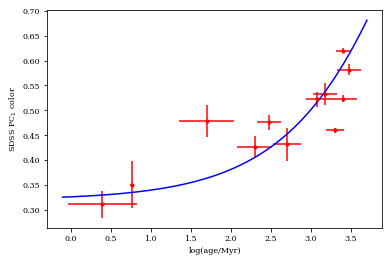

In [61]:
# let's take a quick look at the data to verify that it looks
# similar to fig. 1 from Jedicke et al. 
logT = np.linspace(-0.1, 3.7, 100)
time = np.power(10,logT)
# the best fit from Jedicke et al. 
color = 0.32 + 1.0*(1-np.exp(-(time/2.5e4)**0.5))
ax = plt.figure().add_subplot(111)
ax.set_xlabel("log(age/Myr)")
ax.set_ylabel("SDSS PC$_1$ color")
ax.plot(logT,color, c='blue')
ax.errorbar(logAge,PC1,xerr=LageErr, yerr=PC1err, color='r', 
             marker='.', ls='None', label='Observed')
plt.show() 

Equation of Model:
$$ y(x) = a + b*\left[1-exp\left(-(x/c)^d\right)\right].  $$

In [62]:
def doMCMCfunc(xObs, yObs, xErr, yErr, doXerror = False, nChain = 10000, nBurn = 2000): 
    def model(xObs, yObs, xErr, yErr, doXerror): 
        a = pymc.Uniform('a', -1000, 1000, value= 1.0)
        b = pymc.Uniform('b', -1000, 1000, value= 0.0)
        c = pymc.Uniform('c', -50000, 50000, value= 1.0)
        d = pymc.Uniform('d', -1000, 1000, value= 0.0)

        if (doXerror):
            xLatent = pymc.Normal('x', mu=xObs, tau=(xErr)**-2)  
        else:
            xLatent = xObs 
        
        @pymc.deterministic()
        def func(x=xLatent, a=a, b=b, c=c, d=d):
            return a + b*(1-np.exp(-(x/c)**d))
    
        y = pymc.Normal('y', mu=func, tau=(yErr)**-2, value=yObs, observed=True)
        return locals()

    myModel = pymc.MCMC(model(xObs,yObs, xErr, yErr, doXerror))
    myModel.sample(nChain, nBurn, 1)
    traces = [myModel.trace(s)[:] for s in ['a', 'b', 'c', 'd']]
    M = pymc.MAP(myModel)
    M.fit()
    fit_vals = (M.a.value, M.b.value, M.c.value, M.d.value)
    return traces, fit_vals

In [63]:
# run MCMC for the function fit
traces, fit_vals = doMCMCfunc(xObs, yObs, xErr, yErr, True, 200000, 2000)

/home/aish/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in power
  from ipykernel import kernelapp as app


 [-----------------100%-----------------] 200000 of 200000 complete in 116.8 sec

a) What are the the best-fit values and standard errors for parameters a, b, c and d? 

In [64]:
names = ['a','b','c','d']
for i in range(0,4):
    print( 'For',names[i],": MeanValue: ", np.mean(traces[i]), "     MedianValue: ", np.median(traces[i]), "     Std. Error: ", np.std(traces[i]))


For a : MeanValue:  1.3042756442      MedianValue:  1.31392289765      Std. Error:  0.270690636714
For b : MeanValue:  -0.981645421635      MedianValue:  -0.971968801697      Std. Error:  0.263401236599
For c : MeanValue:  13070.0055606      MedianValue:  8637.27697312      Std. Error:  12638.179181
For d : MeanValue:  -0.237928676481      MedianValue:  -0.22505750488      Std. Error:  0.0657420033059


b) Show the marginal distributions of fitted parameters (hint: use plot_mcmc)

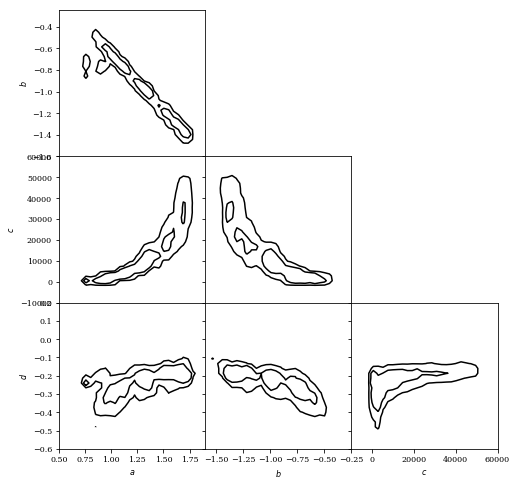

In [70]:
labels = ['$a$', '$b$', '$c$', '$d$']
limits = [(0.5, 1.9), (-1.6, -0.25), (-10000,60000), (-0.6,0.2)]

fig = plt.figure(figsize=(7, 7))
fig.subplots_adjust(bottom=0.3, top=0.8, left=0.15, right=0.9,
                    hspace=0.15, wspace=0.15)

# This function plots multiple panels with the traces
plot_mcmc(traces, labels=labels, limits= limits, fig=fig, bins=30, colors='k')

plt.show()

c) compare your best fit to the best fit from Jedicke et al. and comment

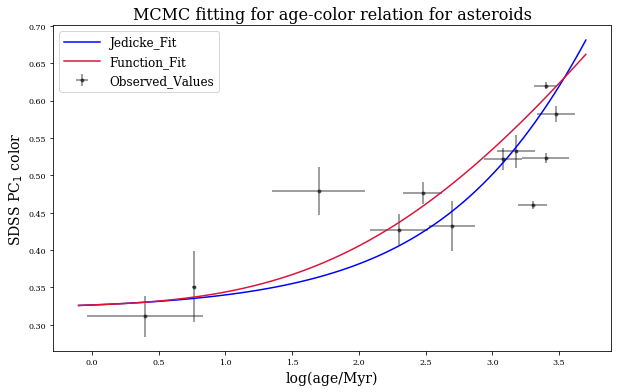

In [75]:
# let's take a quick look at the data to verify that it looks
# similar to fig. 1 from Jedicke et al. 
logT = np.linspace(-0.1, 3.7, 100)
time = np.power(10,logT)

# the best fit from Jedicke et al. 
color = 0.32 + 1.0*(1-np.exp(-(time/2.5e4)**0.5))
ax = plt.figure(figsize=(10,6)).add_subplot(111)
ax.set_xlabel("log(age/Myr)", fontsize = 14)
ax.set_ylabel("SDSS PC$_1$ color", fontsize =14)
ax.plot(logT,color, c='blue', label = 'Jedicke_Fit')
#Our model
color_func = fit_vals[0] + fit_vals[1]*(1-np.exp(-(time/fit_vals[2])**fit_vals[3]))
plt.plot(logT,color_func,'-', c='crimson', label='Function_Fit')
ax.errorbar(logAge,PC1,xerr=LageErr, yerr=PC1err, color='k', 
             marker='.', ls='None', label='Observed_Values', alpha = 0.5)
ax.legend(fontsize = 12)
ax.set_title("MCMC fitting for age-color relation for asteroids", fontsize = 16)
plt.show() 

d) set all age errors to 1000 years (i.e. to 0.001 in Myr): 
do you get a different best fit? 

In [76]:
xnewErr = np.ones(len(age))*0.001
print (xnewErr)

[ 0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001
  0.001  0.001]


In [77]:
# run MCMC for the function fit
traces_new, fit_vals_new = doMCMCfunc(xObs, yObs, xnewErr, yErr, True, 200000, 2000)

/home/aish/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in power
  from ipykernel import kernelapp as app


 [                  1%                  ] 3930 of 200000 complete in 3.5 sec

/home/aish/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in power
  from ipykernel import kernelapp as app


 [-----------------100%-----------------] 200000 of 200000 complete in 108.1 sec

/home/aish/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in power
  del sys.path[0]


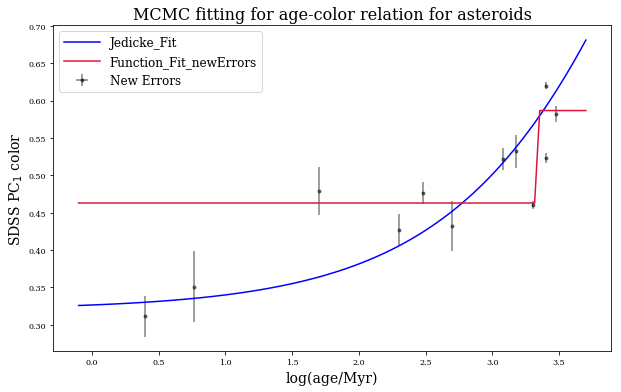

In [79]:
# let's take a quick look at the data to verify that it looks
# similar to fig. 1 from Jedicke et al. 
logT = np.linspace(-0.1, 3.7, 100)
time = np.power(10,logT)

# the best fit from Jedicke et al. 
color = 0.32 + 1.0*(1-np.exp(-(time/2.5e4)**0.5))
ax = plt.figure(figsize=(10,6)).add_subplot(111)
ax.set_xlabel("log(age/Myr)", fontsize = 14)
ax.set_ylabel("SDSS PC$_1$ color", fontsize =14)
ax.plot(logT,color, c='blue', label = 'Jedicke_Fit')
#Our model
color_func = fit_vals_new[0] + fit_vals_new[1]*(1-np.exp(-(time/fit_vals_new[2])**fit_vals_new[3]))
plt.plot(logT,color_func,'-', c='crimson', label='Function_Fit_newErrors')
ax.errorbar(logAge,PC1,xerr=(xnewErr), yerr=PC1err, color='k', 
             marker='.', ls='None', label='New Errors', alpha = 0.5)
ax.legend(fontsize = 12)
ax.set_title("MCMC fitting for age-color relation for asteroids", fontsize = 16)
plt.show() 

***Comment:*** Yes, the best fit is different and isn't a good fit. 

Submitted on: 13.11.2018.